# Ciencia de datos y BigData<a class="tocSkip">
### Ingenieria Electrónica <a class="tocSkip">
### Universidad Popular del Cesar <a class="tocSkip">
### Prof.: Jose Ramón Iglesias Gamarra - [https://github.com/joseramoniglesias/](https://github.com/joseramoniglesias/) <a class="tocSkip">
  **joseiglesias@unicesar.edu.co**

**PROGRAMACIÓN Y ESTADÍSTICA BÁSICA**

## **Descripción**

En este módulo se abordarán los principios de programación para el manejo de datos desde Python. Además, se estudiarán algunas herramientas para el análisis exploratorio de datos como apoyo a la toma de decisiones informadas.

## Configuración del entorno de trabajo

In [ ]:
# @title
# el comando `git clone <enlace_repositorio>` copia el contenido del repositorio en el directorio de trabajo
!git clone https://github.com/joseramoniglesias/EL460_Ciencia_de_datos_y_BigData.git
# el comando `cd <carpeta>` cambia el directorio de trabajo
# en este caso, dejando el repositorio recién descargado
%cd "/content/EL460_Ciencia_de_datos_y_BigData/"

# **Sesión 1**

En esta sesión aprenderemos a manejar datos con pandas, utilizando un dataset de [precios de vivienda en California](https://www.kaggle.com/datasets/camnugent/california-housing-prices) como ejemplo. Nos enfocaremos en explorar el dataset usando las funciones clave como `.head()`, `.info()`, y `.value_counts()`, entre otras.


## **Importación de Librerías**
Lo primero que debemos hacer es importar las librerías necesarias.

In [1]:
import pandas as pd     # manipulación y análisis de datos
import numpy as np      # matrices y arreglos multidimensionales, junto con funciones matemáticas
import sqlite3          # interactuar con bases de datos SQLite
import ipywidgets as widgets # controles interactivos
from ipywidgets import interact # controles interactivos

## **Importación y Exportación de Datasets en Diferentes Formatos**

Ahora, debemos cargar los datos que vamos a usar en nuestro ejercicio. Los formatos de datos más habituales incluyen:
- **CSV (Comma-Separated Values):** Un formato de texto simple en el que los datos se organizan en filas y columnas separadas por comas. Es ampliamente utilizado para intercambiar datos entre aplicaciones, especialmente en hojas de cálculo y bases de datos.

- **JSON (JavaScript Object Notation):** Un formato de datos estructurado que organiza la información en pares clave-valor. Es legible tanto para humanos como para máquinas, y es comúnmente utilizado en APIs (Application Programming Interface) y aplicaciones web.

- **SQL (Structured Query Language):** No es un formato de archivo en sí, pero se refiere al lenguaje utilizado para interactuar con bases de datos relacionales. Los datos se almacenan en tablas dentro de una base de datos, y se accede a ellos mediante consultas SQL.

- **Excel (XLSX/XLS):** Un formato de archivo utilizado por Microsoft Excel para almacenar datos en hojas de cálculo. Soporta tanto datos tabulares como gráficos y permite un almacenamiento más complejo, con fórmulas, filtros y formatos avanzados.

Para la manipulación de estos datos en formato tabular, la librería de Python más ampliamente usada es **`pandas`**. Esta cuenta con funciones para leer y guardar datos tabulares en los formatos mencionados.

En este caso, tenemos el archivo `/content/curso_IA_CHEC/Modulo1/databases/california_housing.csv`. Para cargar estos datos en formato CSV usamos la función [read_csv()](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

Los principales parámetros de esta función son:
- **`filepath_or_buffer`**: Ruta o URL del archivo CSV.
- **`sep`**: Separador de campos, por defecto `','`.
- **`header`**: Fila que contiene los nombres de columnas (por defecto, la primera: `header=0`).
- **`names`**: Lista de nombres de columnas si no hay encabezado o si se quiere personalizar.
- **`index_col`**: Columna(s) a usar como índice del DataFrame.
- **`usecols`**: Columnas a leer, especificadas por nombres o posiciones.
- **`dtype`**: Tipos de datos a usar para las columnas.
- **`na_values`**: Valores adicionales a considerar como `NaN`.
- **`nrows`**: Número de filas a leer.
- **`skiprows`**: Filas a omitir al inicio del archivo.
- **`parse_dates`**: Columna(s) a interpretar como fechas.

En la mayoría de ocasiones los valores por defecto son adecuados así que no hace falta modificarlos.
Análogamente, **`pandas`** cuenta con funciones para leer archivos en los formatos anteriormente mencionados: [read_json()](https://pandas.pydata.org/docs/reference/api/pandas.read_json.html), [read_sql()](https://pandas.pydata.org/docs/reference/api/pandas.read_sql.html) y [read_excel()](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html)


In [2]:
# se cargan los datos en formato csv
housing = pd.read_csv('databases/california_housing.csv')

Por otra parte, se cuenta con funciones para guardar Datasets en los formatos mencionados. Por ejemplo, para guardar en formato CSV se tiene el método [DataFrame.to_csv()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html) cuyos principales parámetros son:
- **`path_or_buf`**: Ruta o buffer donde se guardará el CSV. Si no se especifica, devuelve el CSV como una cadena.
- **`sep`**: Separador de campos, por defecto `','`.
- **`index`**: Si incluir o no el índice del DataFrame (por defecto `True`).
- **`header`**: Si incluir o no los nombres de las columnas (por defecto `True`).
- **`columns`**: Lista de columnas que se desean exportar.
- **`na_rep`**: Representación de los valores `NaN` (por defecto, están en blanco).
- **`float_format`**: Formato para los valores de punto flotante.
- **`date_format`**: Formato para las columnas con fechas.
- **`encoding`**: Codificación del archivo resultante (por ejemplo, `'utf-8'`).
- **`line_terminator`**: Caracteres que se usarán para terminar las líneas (por defecto `'\n'`).

Y así como este, se tienen métodos para guardar en formato JSON ([DataFrame.to_json()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_json.html)), SQL ([DataFrame.to_sql()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_sql.html)) y Excel ([DataFrame.to_excel()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html)).

Para fines ilustrativos, vamos a guardar el archivo que acabamos de leer en los demás formatos.

In [4]:
# housing.to_csv('Modulo1/databases/california_housing.csv', index=False)
housing.to_json('databases/california_housing.json')
housing.to_excel('databases/california_housing.xlsx', index=False)

In [5]:
# para guardar con SQL primero creamos la base de datos y nos conectamos a esta
# con la librería sqlite3
conn = sqlite3.connect('databases/california_housing.db')
# el método to_sql recibe de primer parámetro el nombre de la tabla, y de segundo
# la base de datos
housing.to_sql('housing', conn, if_exists='replace', index=False)
conn.close()

Los archivos generados se encuentran en las rutas especificadas:
- `/content/EL460_Ciencia_de_datos_y_BigData/databases/california_housing.json`
- `/content/EL460_Ciencia_de_datos_y_BigData/databases/california_housing.xlsx`
- `/content/EL460_Ciencia_de_datos_y_BigData/databases/california_housing.db`

Ahora procedemos a leer estos archivos.



In [6]:
housing_json = pd.read_json('databases/california_housing.json')
housing_excel = pd.read_excel('databases/california_housing.xlsx')

conn = sqlite3.connect('databases/california_housing.db')
housing_sql = pd.read_sql("SELECT * FROM housing", conn)
conn.close()

Si exploramos `housing_json`, `housing_excel` y `housing_sql` podemos ver que los 3 son iguales a `housing`. Durante el desarrollo de esta sesión usaremos solamente este último, por lo que podemos eliminar los otros de la memoria.


In [7]:
del housing_json, housing_excel, housing_sql

## **Exploración Inicial del Dataset con `.head()`**

La función `.head()` nos permite visualizar las primeras filas del dataset, facilitando una primera exploración rápida y general de la estructura y el contenido de los datos. Esto es particularmente útil para identificar la naturaleza de las columnas y la calidad de los datos al comenzar un análisis.

In [8]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Puedes ajustar el número 5 a cualquier número entero positivo para mostrar más o menos filas según sea necesario. A continuación, puedes seleccionar cuántas filas deseas visualizar en la tabla.

In [9]:
@interact(x=(0, 100, 1))
def actualizar(x=5):
    # la función display es para que se muestra la tabla al ser usado
    # .head dentro de una función
    display(housing.head(x))

interactive(children=(IntSlider(value=5, description='x'), Output()), _dom_classes=('widget-interact',))

## **Información General del Dataset con `.info()`**

La función `.info()` nos da un resumen del dataset, incluyendo el número de entradas, los tipos de datos de cada columna y la cantidad de valores nulos. Esto es muy útil para entender la estructura de los datos y posibles problemas de calidad (como valores faltantes).

In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## **Análisis de Frecuencia con .value_counts()**

La función `.value_counts()` es útil para analizar la frecuencia de los valores en una columna específica. Por ejemplo, podemos ver cuántas veces aparece cada valor. Por ejemplo, a continuación se presenta cómo hacer el análisis sobre `ocean_proximity`:

In [11]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Esto nos dice que la proximidad al óceano más comun es **<1H OCEAN**. Puedes cambiar el argumento `ocean_proximity` por cualquier columna. A continuación, puedes seleccionar una columna para ver los 10 elementos más frecuentes de ella.

In [12]:
# Función para mostrar el conteo de valores únicos en la columna seleccionada
def al_cambiar_columna(cambio):
    columna = cambio if isinstance(cambio, str) else cambio.new
    conteo_valores = housing[columna].value_counts()
    # Limitar los resultados a los primeros 10 conteos
    conteo_limitado = conteo_valores.head(10)
    # Convertir los conteos limitados a HTML para mostrar en el widget
    etiqueta_resultado.value = conteo_limitado.to_frame().to_html(classes='table table-striped', border=0)


# Crear un menú desplegable con los nombres de las columnas
desplegable_columnas = widgets.Dropdown(
    options=housing.columns,
    value=housing.columns[0],  # Valor predeterminado
    description='Columna:',
)

# Crear una etiqueta para mostrar el resultado en formato HTML
etiqueta_resultado = widgets.HTML(value='')

al_cambiar_columna(desplegable_columnas.value)
# Enlazar la función con el cambio en el menú desplegable
desplegable_columnas.observe(al_cambiar_columna, names='value')

# Mostrar el menú desplegable y la etiqueta
display(desplegable_columnas, etiqueta_resultado)

Dropdown(description='Columna:', options=('longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total…

HTML(value='<table class="dataframe table table-striped">\n  <thead>\n    <tr style="text-align: right;">\n   …

## **Indexación Básica**

* Podemos solo ver columnas de nuestro interés especificándolas en el DataFrame

In [13]:
housing[['population', 'median_house_value']]

,population,median_house_value
0,322.0,452600.0
1,2401.0,358500.0
2,496.0,352100.0
3,558.0,341300.0
4,565.0,342200.0
...,...,...
20635,845.0,78100.0
20636,356.0,77100.0
20637,1007.0,92300.0
20638,741.0,84700.0


In [14]:
print("Selecciona las columnas que sean de tu interés para visualizar.")

# Crear casillas de verificación para seleccionar columnas
casillas = [widgets.Checkbox(value=False, description=col) for col in housing.columns]

# Crear un área de salida para mostrar el DataFrame
salida = widgets.Output()

# Función para mostrar las columnas seleccionadas
def mostrar_columnas(b):
    with salida:
        # Limpiar el área de salida
        salida.clear_output()
        # Obtener las columnas seleccionadas
        columnas_seleccionadas = [col.description for col in casillas if col.value]
        if columnas_seleccionadas:
            # Mostrar DataFrame filtrado
            display(housing[columnas_seleccionadas])
        else:
            print("Selecciona al menos una columna para mostrar el DataFrame.")

# Crear un botón para actualizar la selección
boton_actualizar = widgets.Button(description="Actualizar selección")
boton_actualizar.on_click(mostrar_columnas)

# Mostrar casillas y botón
display(*casillas)
display(boton_actualizar)

# Mostrar el área de salida
display(salida)

Selecciona las columnas que sean de tu interés para visualizar.


Checkbox(value=False, description='longitude')

Checkbox(value=False, description='latitude')

Checkbox(value=False, description='housing_median_age')

Checkbox(value=False, description='total_rooms')

Checkbox(value=False, description='total_bedrooms')

Checkbox(value=False, description='population')

Checkbox(value=False, description='households')

Checkbox(value=False, description='median_income')

Checkbox(value=False, description='median_house_value')

Checkbox(value=False, description='ocean_proximity')

Button(description='Actualizar selección', style=ButtonStyle())

Output()



* `.index` proporciona los índices del DataFrame.

  El índice de un DataFrame es una serie de etiquetas que identifican cada fila. Las etiquetas pueden ser números enteros, cadenas o cualquier otro tipo hash. El índice se utiliza para el acceso y la alineación basados ​​en etiquetas, y se puede acceder a él o modificarlo mediante este atributo

In [15]:
housing.index

RangeIndex(start=0, stop=20640, step=1)

En este caso, cada entrada (fila) está representada por un número del 0 al 16999 (no se cuenta el final).

In [16]:
housing.index[0] # el índice del elemento 0 es 0

0

In [17]:
housing.index[455] # el índice del elemento 455 es 455

455

* `.loc` nos permite seleccionar unas filas y/o unas muestras en específico.

  Por ejemplo, para seleccionar las filas 0, 4 y 5:

In [18]:
housing.loc[[0,4,5]]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY


Por otro lado, también podemos seleccionar cuáles son las columnas que queremos ver de las filas especificadas. Por ejemplo,  seleccionemos solo las columnas de estas que nos dan la posición geográfica (`longitude` y `latitude`):

In [19]:
housing.loc[[0,4,5],['longitude', 'latitude']]

,longitude,latitude
0,-122.23,37.88
4,-122.25,37.85
5,-122.25,37.85


In [20]:
# @title

print("Selecciona las columnas que te interesan ver de estos datos.")

# Crear checkboxes para seleccionar columnas
checkboxes = [widgets.Checkbox(value=False, description=col) for col in housing.columns]

# Crear un área de salida para mostrar el DataFrame
output = widgets.Output()

# Función para mostrar las columnas seleccionadas
def mostrar_columnas(b):
    with output:
        # Limpiar el área de salida
        output.clear_output()
        # Obtener las columnas seleccionadas
        columnas_seleccionadas = [col.description for col in checkboxes if col.value]
        if columnas_seleccionadas:
            # Mostrar DataFrame filtrado
            display(housing.loc[[0,4,5],columnas_seleccionadas])
        else:
            display("Selecciona al menos una columna para mostrar el DataFrame.")

# Crear un botón para actualizar la selección
boton = widgets.Button(description="Actualizar selección")
boton.on_click(mostrar_columnas)

# Mostrar checkboxes y botón
display(*checkboxes)
display(boton)

# Mostrar el área de salida
display(output)

Selecciona las columnas que te interesan ver de estos datos.


Checkbox(value=False, description='longitude')

Checkbox(value=False, description='latitude')

Checkbox(value=False, description='housing_median_age')

Checkbox(value=False, description='total_rooms')

Checkbox(value=False, description='total_bedrooms')

Checkbox(value=False, description='population')

Checkbox(value=False, description='households')

Checkbox(value=False, description='median_income')

Checkbox(value=False, description='median_house_value')

Checkbox(value=False, description='ocean_proximity')

Button(description='Actualizar selección', style=ButtonStyle())

Output()

También se tiene `.iloc`, que funciona igual a `.loc` pero usando índices posicionales en lugar de los índices y columnas del DataFrame

## **Análisis Estadístico Básico**

* `.describe()` genera las estadísticas básicas de las variables (columnas). Las estadísticas descriptivas incluyen aquellas que resumen la tendencia central, la dispersión y la forma de la distribución de un conjunto de datos, excluyendo los valores faltantes.

Las cuales se definen de la siguiente manera:



  1. **count (cantidad de elementos):** nos permite saber cuántos elementos no faltantes hay en en la columna.

  2. **mean (promedio):** El promedio es una medida de tendencia central calculada sumando todos los valores de un conjunto de datos y dividiendo el resultado por la cantidad de valores.
$$\bar{x} = \frac{\sum_{i=1}^{n} x_i}{n}$$
donde:
- $x_i$ es cada valor individual.
- $n$ el número total de valores.

3. **std (desviación estándar):** La desviación estándar mide la dispersión de los datos repecto al promedio.

  Muestral:
  $$
  s^2 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n - 1}
  $$
  Poblacional:
  $$
  \sigma^2 = \frac{\sum_{i=1}^{N} (x_i - \mu)^2}{N}
  $$
  donde:
  - $x_i$ es cada valor.
  - $\bar{x}$ es el promedio de la muestra.
  - $\mu$ es el promedio de la población.
  - $n$ es el tamaño de la muestra.
  - $N$ es el tamaño totla de la población.

4. **min:** El valor mínimo registrado en la columna.

5. **25% (Primer cuartil):** El 25% de los datos está por debajo de este valor, indicando el límite inferior de la distribución.
6. **50% (Mediana o segundo cuartil):** El valor central de la distribución, donde el 50% de los datos está por debajo de este valor.

7. **75% (Tercer cuartil):** El 75% de los datos está por debajo de este valor, marcando el límite superior de la mayoría de los datos.

8. **max:** El valor máximo registrado en la columna.


Selecciona la columna que te interese conocer su estadística básica.

In [24]:
# @title
# Función para mostrar el conteo de valores únicos en la columna seleccionada
def on_column_change(change):
    column = change.new
    if column in housing.columns:
        stadic = housing[column].describe()

        # Convertir los conteos limitados a HTML para mostrar en el widget
        result_label.value = stadic.to_frame().to_html(classes='table table-striped', border=0)
    else:
        result_label.value = 'Columna no válida'

# Crear un menú desplegable con los nombres de las columnas
column_dropdown = widgets.Dropdown(
    options=housing.columns,
    value=housing.columns[0],  # Valor predeterminado
    description='Columna:',
)

# Crear una etiqueta para mostrar el resultado en formato HTML
result_label = widgets.HTML(value='')

# Enlazar la función con el cambio en el menú desplegable
column_dropdown.observe(on_column_change, names='value')

# Mostrar el menú desplegable y la etiqueta
display(column_dropdown, result_label)

Dropdown(description='Columna:', options=('longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total…

HTML(value='')

* `.cov()`: La covarianza mide como dos variables cambian juntas.

  Muestral:
$$
\text{Cov}(X, Y) = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{n - 1}
$$

  Poblacional:
$$
\text{Cov}(X, Y) = \frac{\sum_{i=1}^{N} (x_i - \mu_x)(y_i - \mu_y)}{N}
$$

  donde:
  - $x_i$ e $y_i$ son los valores de las variables $X$ e $Y$.
  - $\bar{x}$ y $\bar{y}$ son los promedios muestrales de $X$ e $Y$.
  - $\mu_x$ y $\mu_y$ son los promedios de $X$ e $Y$ en la población.
  - $n$ es el tamaño de la muestra.
  - $N$ es el tamaño total de la población.

In [25]:
housing_numerico = housing.iloc[:,:-1]
cov_matrix = housing_numerico.cov()
cov_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,4.014139,-3.957054,-2.728244,1.948037e+02,5.876851e+01,2.263778e+02,4.236807e+01,-0.057765,-1.062743e+04
latitude,-3.957054,4.562293,0.300346,-1.682178e+02,-6.029962e+01,-2.631378e+02,-5.801024e+01,-0.323860,-3.553256e+04
housing_median_age,-2.728244,0.300346,158.396260,-9.919120e+03,-1.700313e+03,-4.222271e+03,-1.457581e+03,-2.846140,1.533988e+05
total_rooms,194.803750,-168.217847,-9919.120060,4.759445e+06,8.567306e+05,2.117613e+06,7.661046e+05,820.852410,3.377289e+07
total_bedrooms,58.768508,-60.299623,-1700.312817,8.567306e+05,1.775654e+05,4.191391e+05,1.578295e+05,-6.180851,2.416878e+06
population,226.377839,-263.137814,-4222.270582,2.117613e+06,4.191391e+05,1.282470e+06,3.928036e+05,10.400979,-3.221249e+06
households,42.368072,-58.010245,-1457.581290,7.661046e+05,1.578295e+05,3.928036e+05,1.461760e+05,9.466667,2.904924e+06
median_income,-0.057765,-0.323860,-2.846140,8.208524e+02,-6.180851e+00,1.040098e+01,9.466667e+00,3.609323,1.508475e+05
median_house_value,-10627.425205,-35532.559074,153398.801329,3.377289e+07,2.416878e+06,-3.221249e+06,2.904924e+06,150847.482793,1.331615e+10


* `.corr()`: la correlación es una versión normalizada de la covarianza, que mide tanto la dirección como la fuerza de la relación entre las dos variables. La correlación siempre está en el rango de -1 a 1, lo que facilita la interpretación.

  $$
  \rho_{XY} = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}
  $$
  donde:
  - $\sigma_X$ y $\sigma_Y$ son las desviaciones estándar de $X$ e $Y$.

In [26]:
corr_matrix = housing_numerico.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


Para obtener una representación visual de la matriz de correlación, podemos utilizar un mapa de calor.

<Axes: >

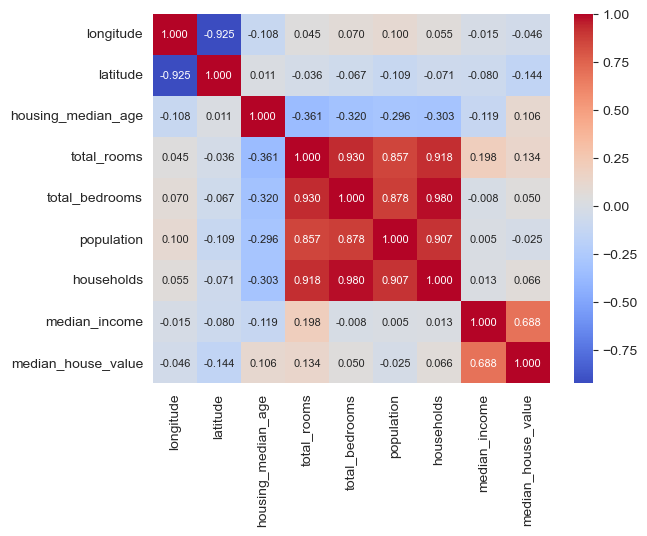

In [27]:
import seaborn as sns  # Se importa la librería seaborn, que se utiliza para crear gráficos estadísticos.

# Se crea un mapa de calor de la matriz de correlación (corr_matrix) utilizando la función heatmap de seaborn.
# Se especifica que las etiquetas de los ejes x e y sean los nombres de las columnas de la matriz de correlación.
sns.heatmap(corr_matrix,
            xticklabels=corr_matrix.columns.values,  # Etiquetas del eje X
            yticklabels=corr_matrix.columns.values,  # Etiquetas del eje Y
            cmap='coolwarm',  # gama de colores a usar
            annot=True, # mostrar valor en cada casilla
            fmt=".3f",  # redondear valores a 3 decimales
            annot_kws={"size": 8}) # tamaño de valores mostrados en cada casilla

### **Correlación Parcial**
La correlación parcial mide la relación entre dos variables mientras se controla el efecto de una o más variables adicionales.
$$
\rho_{XY \cdot Z} = \frac{\text{Cov}(X - \text{proyección de } X \text{ sobre } Z, Y - \text{proyección de } Y \text{ sobre } Z)}{\sigma_{X - \text{proyección}} \sigma_{Y - \text{proyección}}}
$$
que puede expresarse en términos de correlaciones como:
$$
\rho_{xy \cdot z} = \frac{\rho_{xy} - \rho_{xz}\rho_{yz}}{\sqrt{(1 - \rho_{xz}^2)(1 - \rho_{yz}^2)}}
$$
cuando $Z$ corresponde a una única variable, o como:
$$
\rho_{XY \cdot Z} = \frac{-R^{-1}_{XY}}{\sqrt{R^{-1}_{XX} R^{-1}_{YY}}}
$$
donde $R$ es la matriz de correlación ($R_{XY} = \rho_{XY}$).
En este caso se calcula la corelación parcial de $X$ e $Y$ tomando como $Z$ las demás variables incluídas en $R$.

Calculemos la correlación de las variables numéricas de nuestro Dataset controlando el efecto de la variable objetivo `median_house_value`.


In [28]:
# se calcula la matriz R de correlación
Rh = housing_numerico.corr()
# se inicializa la matriz de correlación parcial, del mismo tamaño de R
# pero quitándole la fila/columna correspondiente a median_house_value
R_parcial = pd.DataFrame(np.zeros((Rh.shape[0]-1, Rh.shape[1]-1)),
                         columns=Rh.columns[:-1], index=Rh.columns[:-1])
# fijamoz el iterador de z a la última columna
iz = -1
# iteramos sobre las demás columnas
for ix in range(len(housing_numerico.columns) - 1):
    for iy in range(ix + 1, len(housing_numerico.columns) - 1):
        R_xy = Rh.iloc[ix, iy]
        R_xz = Rh.iloc[ix, iz]
        R_yz = Rh.iloc[iy, iz]
        # calculamos la correlación parcial
        pcorr = (R_xy - R_xz * R_yz) / np.sqrt((1 - R_xz**2) * (1 - R_yz**2))
        # almacenamos este valor en la posición correspondiente en la matriz de
        # correlación parcial
        R_parcial.iloc[ix, iy] = pcorr

# arriba solo calculamos la triangular superior, pues la matriz es simétrica
R_parcial += R_parcial.T
np.fill_diagonal(R_parcial.values, 1)

<Axes: >

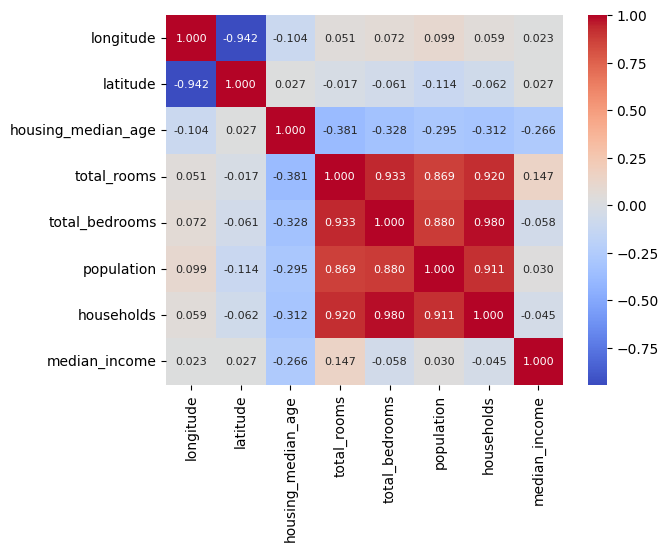

In [ ]:
sns.heatmap(R_parcial,
            xticklabels=R_parcial.columns.values,  # Etiquetas del eje X
            yticklabels=R_parcial.columns.values,  # Etiquetas del eje Y
            cmap='coolwarm',  # gama de colores a usar
            annot=True, # mostrar valor en cada casilla
            fmt=".3f",  # redondear valores a 3 decimales
            annot_kws={"size": 8}) # tamaño de valores mostrados en cada casilla

## **Imputación de Datos**
Anteriormente, pudimos ver que la columna `total_bedrooms` cuenta con varias columnas que no tienen datos. Esta situación puede resultar inconveniente durante futuros análisis o modelados que se quieran realizar a los datos. Por este motivo, es importante realizar un proceso de reemplazar valores faltantes con estimaciones razonables. Este proceso se conoce como imputación de datos.

Una ténica común consiste en usar una medida de tendencia central (media, mediana o moda) para realizar la imputación. Sin embargo, cabe recalcar que esta decisión depende de distintos factores relacionados con la naturaleza y cantidad de los datos faltantes.

Veamos como podemos realizar imputación en nuestros datos usando la media y el método `.fillna()`.

In [29]:
# inplace=True hace que el DataFrame housing quede modificado
housing['total_bedrooms'].fillna(housing['total_bedrooms'].mean(), inplace=True)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_15748\3584847466.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing['total_bedrooms'].fillna(housing['total_bedrooms'].mean(), inplace=True)


## **Práctica**
Repasemos algunos de los conceptos vistos en esta sesión en la [siguiente práctica](https://modulo1-sesion1.streamlit.app)

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT).